<a href="https://colab.research.google.com/github/jyotidabass/Image-Processing/blob/main/Variational_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.3430
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2634
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2631
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.2630
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2637
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2637
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2630
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2629
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2631
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.2628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


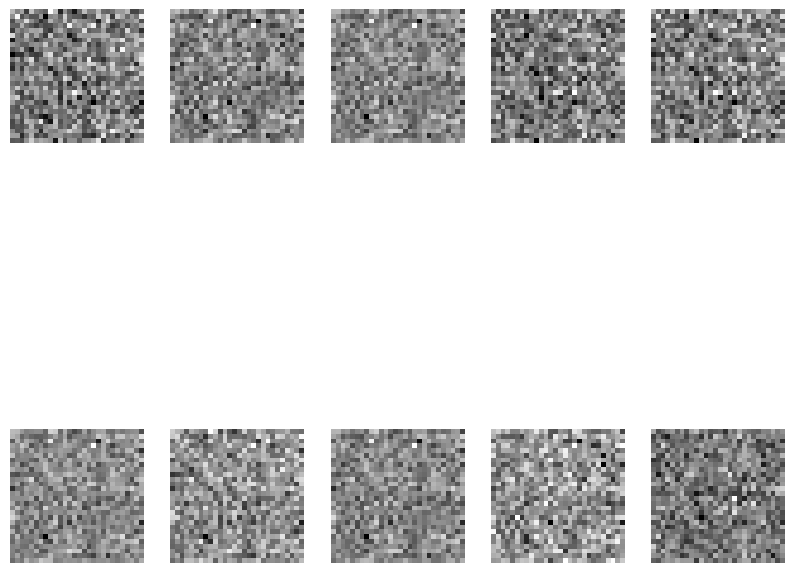

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda, Reshape, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

# Set the random seed for reproducibility
np.random.seed(0)

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(-1, 784)

# Define the VAE model
input_dim = 784
hidden_dim = 256
latent_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(hidden_dim, activation='relu')(input_layer)
encoder = Dense(hidden_dim, activation='relu')(encoder)
z_mean = Dense(latent_dim)(encoder)
z_log_var = Dense(latent_dim)(encoder)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

decoder = Dense(hidden_dim, activation='relu')(z)
decoder = Dense(hidden_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Define the VAE model
vae = Model(input_layer, decoder)

# Define the encoder model
encoder_model = Model(input_layer, [z_mean, z_log_var])

# Define the decoder model
decoder_input = Input(shape=(latent_dim,))
decoder_x = Dense(hidden_dim, activation='relu')(decoder_input)
decoder_x = Dense(hidden_dim, activation='relu')(decoder_x)
decoder_x = Dense(input_dim, activation='sigmoid')(decoder_x)
decoder_model = Model(decoder_input, decoder_x)

# Compile the VAE model
def vae_loss(y_true, y_pred):
    reconstruction_loss = K.mean(K.binary_crossentropy(y_true, y_pred))
    z_mean, z_log_var = encoder_model(y_true)
    kl_loss = 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
    return reconstruction_loss - kl_loss

vae.compile(optimizer='adam', loss=vae_loss)

# Train the VAE model
vae.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True)

# Use the VAE to generate new data
new_data = decoder_model.predict(np.random.normal(size=(10, latent_dim)))

# Plot the generated data
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(new_data[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()